# INMERSIÓN DE DATOS CON PYTHON

In [ ]:
# prompt: importa los siguientes modulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

# Montar drive
drive.mount('/content/drive')
# Filtrar advertencias a fin de ignorarlas
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
# Visualizar todas las columnas
pd.set_option('display.max_columns', None)
# Definir variables globales
global df_banco, resultados

In [ ]:
# Leer archivo
df_banco = pd.read_csv('/content/drive/MyDrive/Cursos/Python 2024/Alura/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
# Obtener cantidad de filas y de columnas
df_banco.shape

(1000, 21)

In [ ]:
# Listado de columnas
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [ ]:
# Listados de columnas y tipo de dato
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
# Contar cantidad de valores para una columna
df_banco.account_check_status.value_counts()

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

In [ ]:
# Obtener una lista con las columnas que son tipo Object (Categoricas)
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'Nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

Nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


Nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


Nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


Nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


Nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


Nombre de la columna: personal_status_sex
['male : single', 'female : divorced/separ

In [ ]:
# Definir función para agregar indice numérico a columnas categoricas
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [ ]:
# Ejecutar función
procesar_datos()
# Tomar una muestra aleatoria
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
268,1,1,14,3,1,8978,5,1,1,1,1,4,2,45,3,2,1,4,1,1,0
26,0,4,6,1,5,426,5,1,4,4,1,4,3,39,3,2,1,2,1,0,1
596,1,1,24,3,1,1442,5,2,4,2,1,4,3,23,3,1,2,3,1,0,1


In [ ]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [ ]:
# Definir función para generar rangos y categorizar agrupando, creando nuevas columnas
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [ ]:
# Ejecutar función
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [ ]:
# Obtener medidas estadisticas de las columnas
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


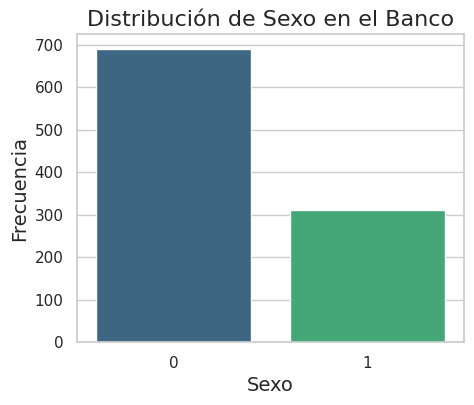

In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje del gráfico
plt.figure(figsize=(5, 4))

# Graficar el histograma de la variable 'sexo'
sns.countplot(data=df_banco, x='sexo', palette='viridis')

# Añadir títulos y etiquetas
plt.title('Distribución de Sexo en el Banco', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [ ]:
# Definir función para gráficar variables categorizadas
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

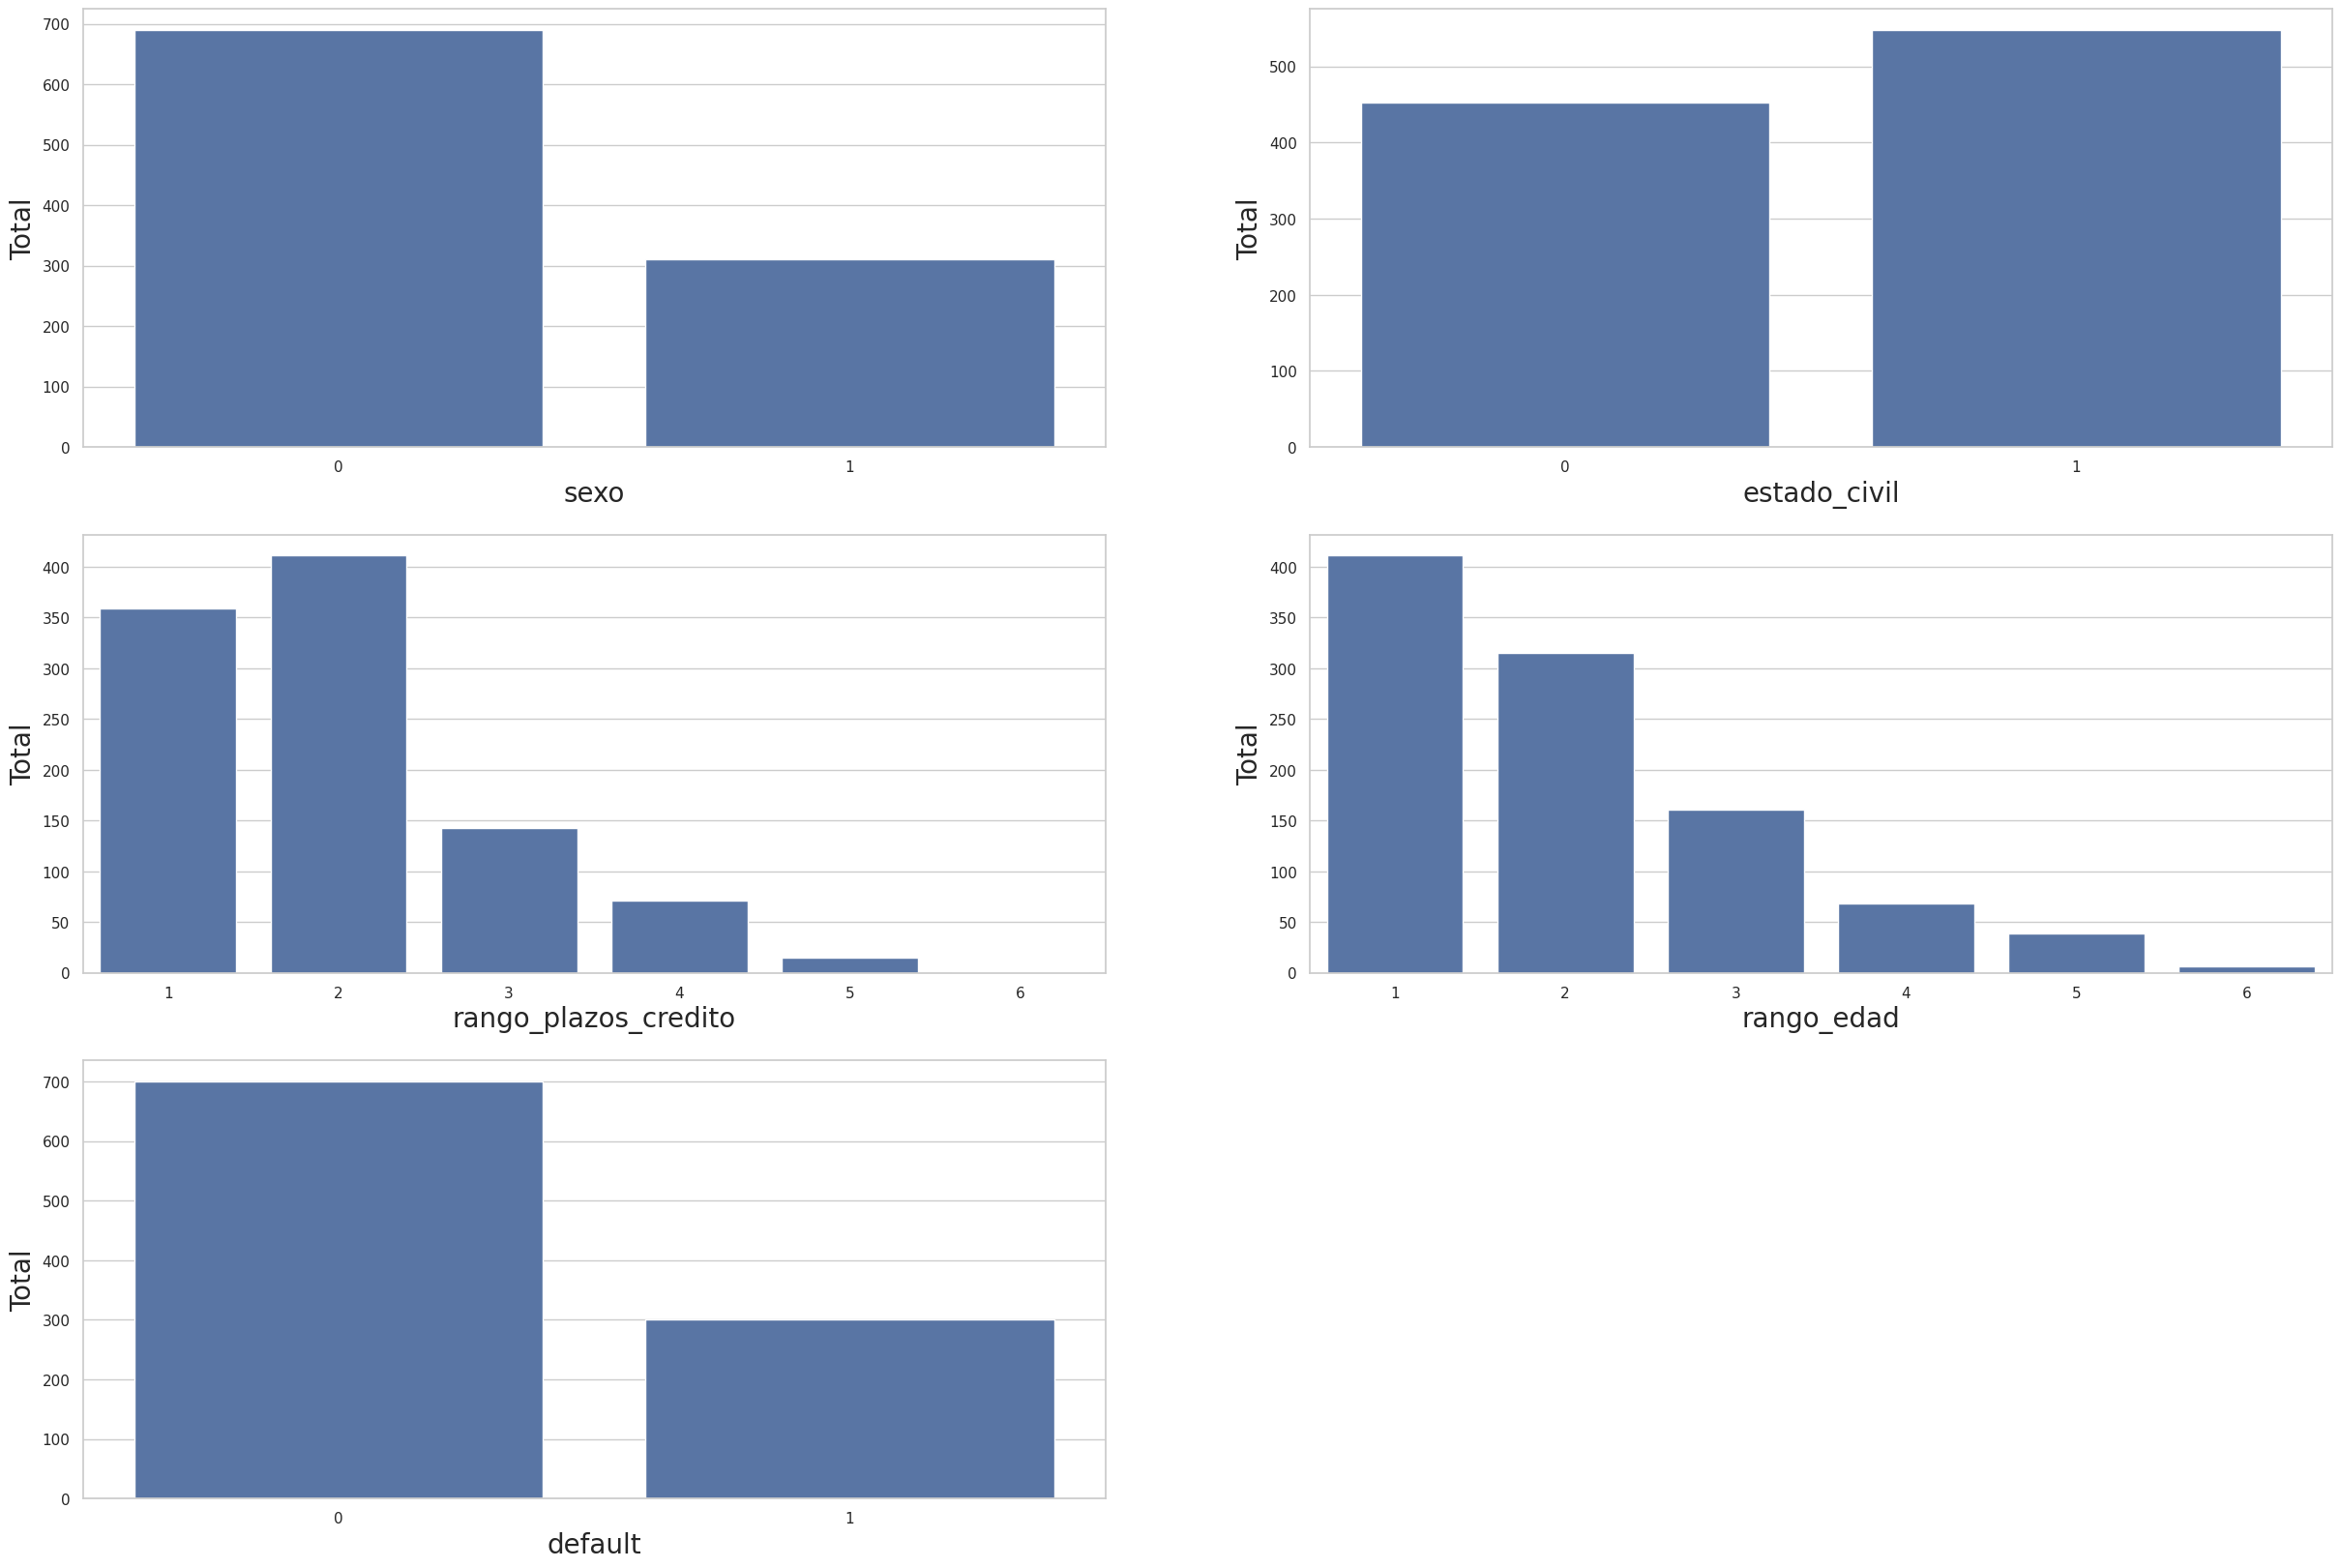

In [ ]:
# Ejecutar función
analisis_exploratorio()

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_banco.corr()
correlation_matrix

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
default,1.000000,-0.350847,-0.228785,0.001514,0.178943,0.116002,0.072404,-0.025137,0.002967,0.142612,-0.109844,-0.019315,-0.045732,0.032735,-0.003015,-0.036466,0.082079,0.075493,-0.080677,-0.080878,0.197321,0.152609
account_check_status,-0.350847,1.000000,0.192191,0.053223,-0.222867,-0.106339,-0.005280,-0.127737,-0.042234,-0.032260,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,0.026758,-0.025578,0.052436,0.066129,-0.069531,-0.042596
credit_history,-0.228785,0.192191,1.000000,-0.081634,-0.039058,-0.138225,0.044375,-0.040676,0.063198,-0.053777,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,-0.013873,-0.071802,0.086008,0.136850,-0.068134,-0.060757
purpose,0.001514,0.053223,-0.081634,1.000000,0.024072,-0.024990,0.078224,-0.032254,-0.062927,-0.031025,-0.039346,-0.019488,0.034958,-0.032655,-0.056450,0.018677,0.124317,-0.017271,-0.025536,-0.019125,0.109430,-0.034348
savings,0.178943,-0.222867,-0.039058,0.024072,1.000000,0.120950,-0.021993,0.105069,-0.091424,-0.018948,-0.001908,-0.006505,0.021644,-0.011709,-0.027514,-0.087208,0.007095,0.034982,-0.060384,-0.077021,-0.046870,-0.064577
present_emp_since,0.116002,-0.106339,-0.138225,-0.024990,0.120950,1.000000,-0.126161,0.008116,-0.245081,-0.087187,0.040154,-0.111126,-0.125791,-0.101225,-0.097192,-0.060518,-0.027232,0.197009,-0.238857,-0.254865,-0.039019,0.012082
installment_as_income_perc,0.072404,-0.005280,0.044375,0.078224,-0.021993,-0.126161,1.000000,-0.011398,0.049302,0.053391,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,0.090024,-0.086302,0.118233,0.039153,0.043738,-0.269688
other_debtors,-0.025137,-0.127737,-0.040676,-0.032254,0.105069,0.008116,-0.011398,1.000000,-0.025678,-0.155450,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,-0.117999,-0.013359,0.006481,-0.034876,-0.009469,-0.031247
present_res_since,0.002967,-0.042234,0.063198,-0.062927,-0.091424,-0.245081,0.049302,-0.025678,1.000000,0.147231,0.002089,0.011941,0.089625,0.012655,0.042643,0.095359,0.054097,0.013818,0.063639,0.262699,0.033841,0.031096
property,0.142612,-0.032260,-0.053777,-0.031025,-0.018948,-0.087187,0.053391,-0.155450,0.147231,1.000000,-0.090033,0.345219,-0.007765,0.276149,0.011872,0.196802,0.132462,-0.051455,0.145125,0.064859,0.290379,0.305677


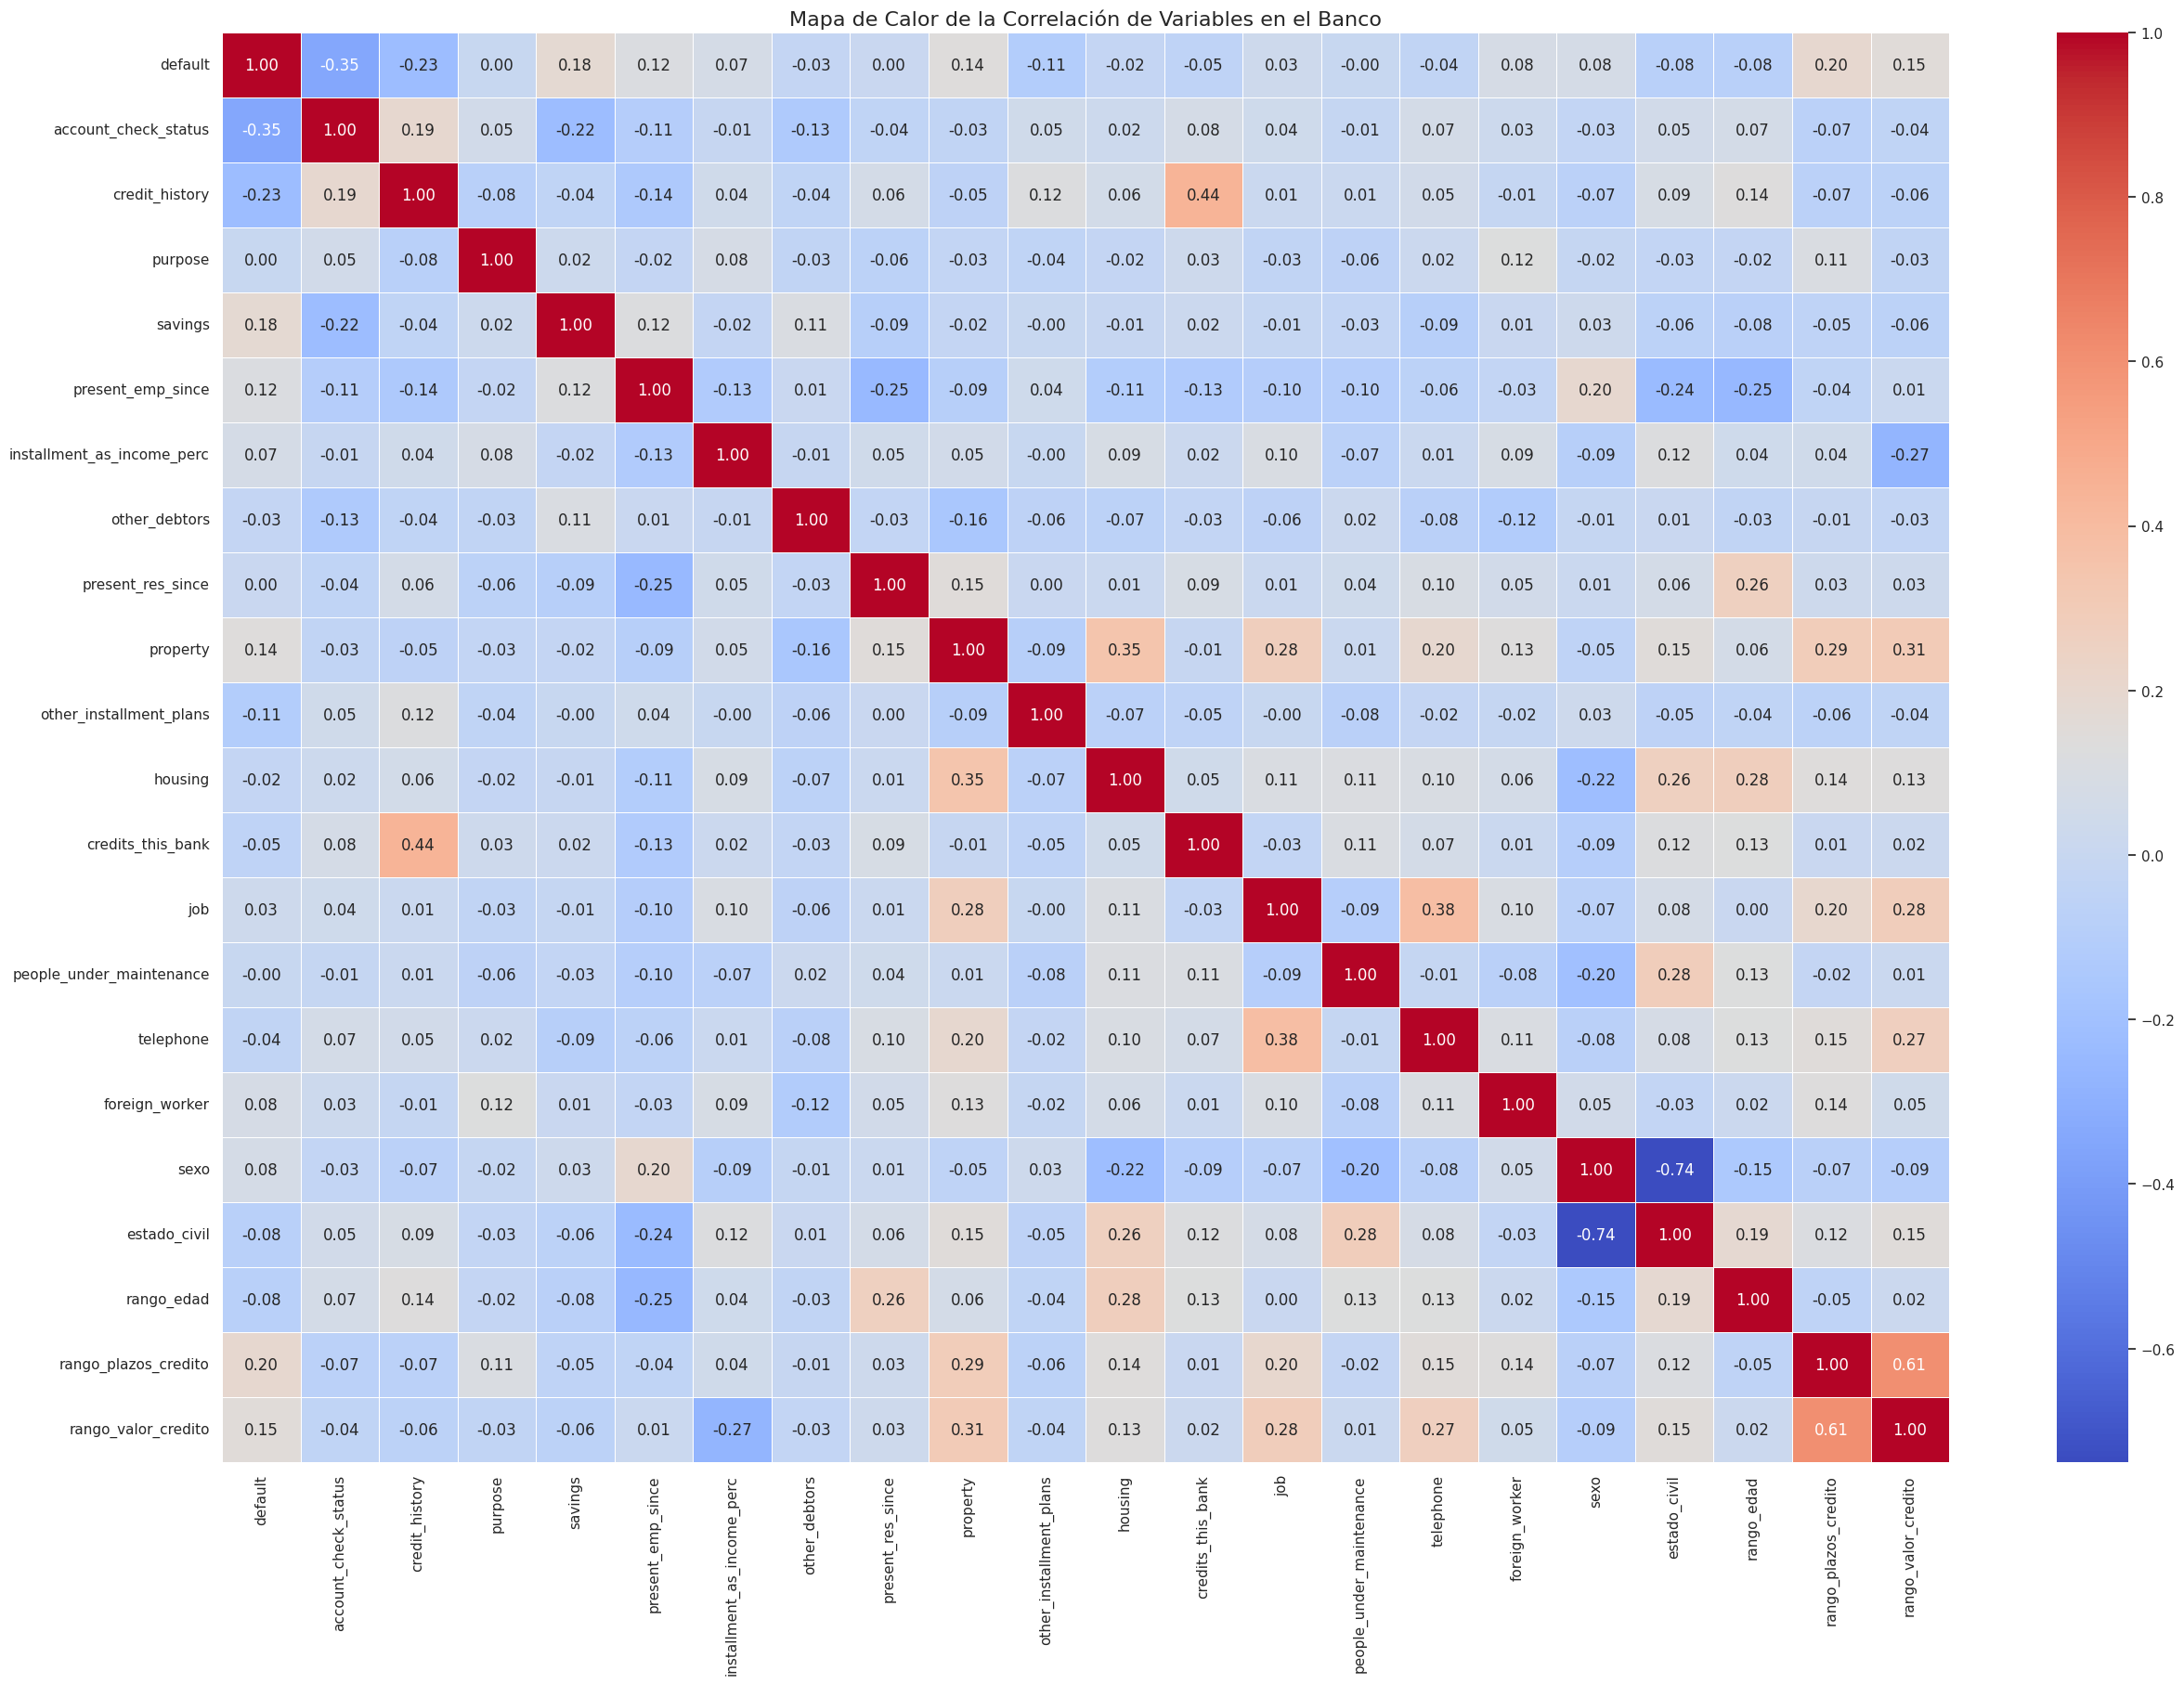

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(30, 20))

# Crear el mapa de calor utilizando seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Añadir un título al gráfico
plt.title('Mapa de Calor de la Correlación de Variables en el Banco', fontsize=16)

# Mostrar el gráfico
plt.show()

In [ ]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [ ]:
# prompt: ejemplo de modelo de machine learning de clasificacion

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


In [ ]:
# Definir función para generar modelos de clasificación y evaluarlos (Regresión Logística, Árbol de Decisión, Random Forest, Naive Bayes)
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [ ]:
# Ejecutar función
crea_modelos()
for i, model in enumerate(resultados['Model']):
  print(model)
  print(resultados["Accuracy"][i])
  print(resultados["Precision"][i])
  print(resultados["Recall"][i])
  print(resultados["F1-score"][i])
  print(resultados["AUC-ROC"][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.7033333333333334
0.4805194805194805
0.43023255813953487
0.45398773006134974
0.6216583351445337


Random Forest
0.7866666666666666
0.7037037037037037
0.4418604651162791
0.5428571428571429
0.7854542490762878


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




In [ ]:
# Definir función para graficar resultados obtenidos de los modelos
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#B4BFD4','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"{texto}"))

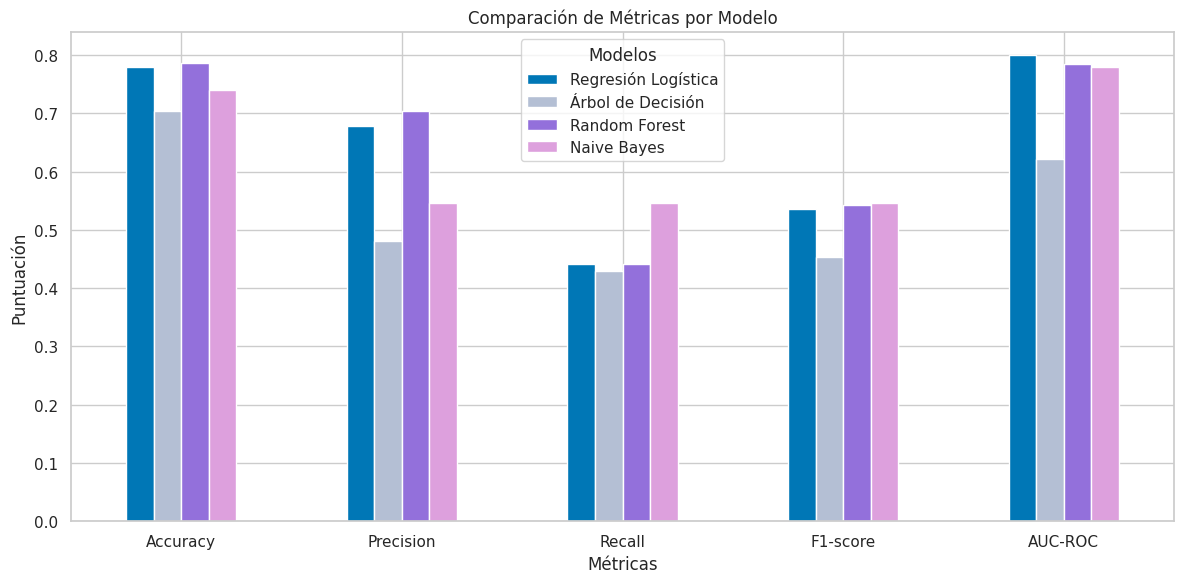

In [ ]:
# Ejecutar función
visualiza_resultados()

In [ ]:
# Definir función para generar modelos de clasificación y evaluarlos, únicamente utilizando las variables correlacionadas (Regresión Logística, Árbol de Decisión, Random Forest, Naive Bayes)
def crea_modelos_variables_correlacionadas():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco[['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_valor_credito']]
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [ ]:
# Ejecutar función
crea_modelos_variables_correlacionadas()
for i, model in enumerate(resultados['Model']):
  print(model)
  print(resultados["Accuracy"][i])
  print(resultados["Precision"][i])
  print(resultados["Recall"][i])
  print(resultados["F1-score"][i])
  print(resultados["AUC-ROC"][i])
  print('\n')

Regresión Logística
0.72
0.5454545454545454
0.13953488372093023
0.22222222222222218
0.5679471853944795


Árbol de Decisión
0.6766666666666666
0.358974358974359
0.16279069767441862
0.224
0.5342316887633123


Random Forest
0.6866666666666666
0.40476190476190477
0.19767441860465115
0.265625
0.5547435340143447


Naive Bayes
0.6766666666666666
0.35135135135135137
0.1511627906976744
0.2113821138211382
0.5823462290806347




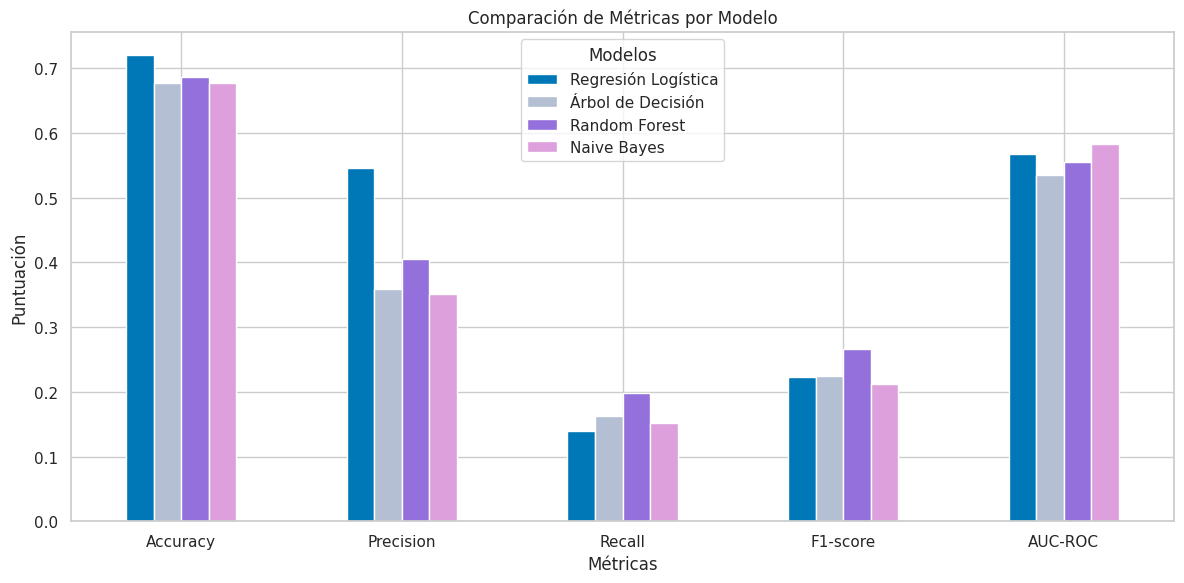

In [ ]:
# Ejecutar función
visualiza_resultados()